# TIME SERIES - ANALYSIS and FORECASTING

## EDA

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [220]:

data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390



data

#exogenous variables


#endogenous and exogenous variable


ARIMA
ARIMAX


SARIMA
SARIMAX



In [221]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [222]:
data
 

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:


import pandas as pd
import datetime
 


In [223]:
data.Month = pd.to_datetime(data.Month)

In [224]:

dataset_ts=data.set_index("Month")
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


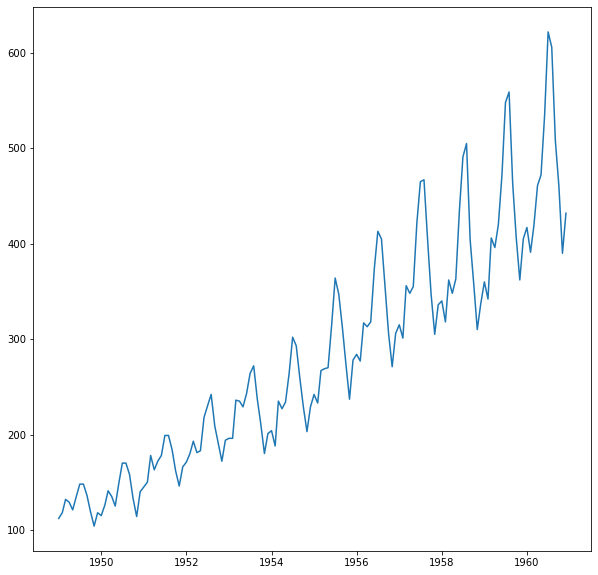

In [225]:
plt.figure(figsize=(10,10))
plt.plot(dataset_ts["#Passengers"])

In [226]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose


#??seasonal_decompose


In [231]:
pd.Series(dataset_ts["#Passengers"])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

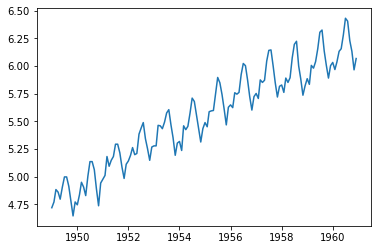

In [232]:
ts_log = np.log(dataset_ts)
plt.plot(ts_log)

In [233]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [200]:
??seasonal_decompose

In [235]:

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

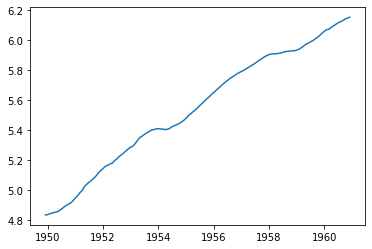

In [236]:
plt.plot(ts_log.rolling(12).mean())

In [237]:

residual.head(100)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1956-12-01   -0.008792
1957-01-01   -0.004277
1957-02-01   -0.032018
1957-03-01   -0.008046
1957-04-01   -0.010242
Name: resid, Length: 100, dtype: float64

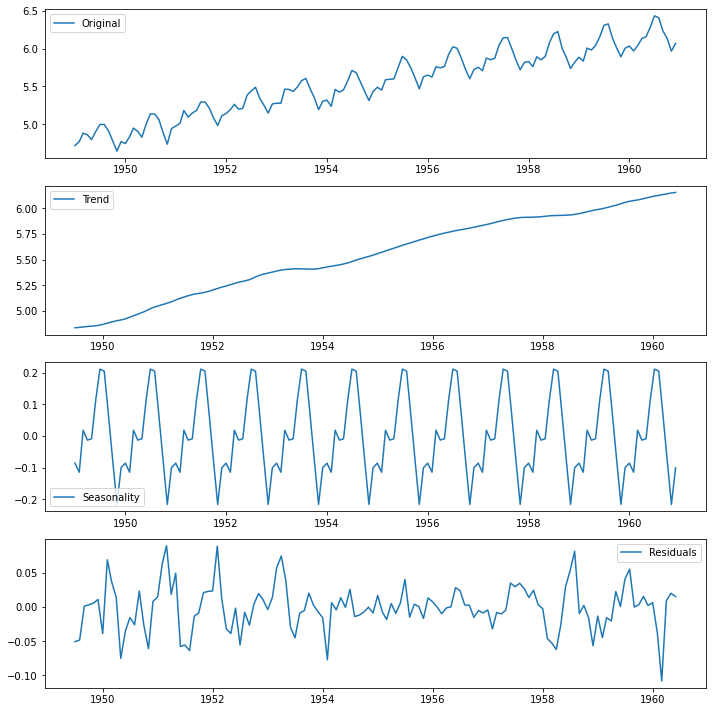

In [238]:

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

# Data Prep (FE)

In [171]:
dataset_ts

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [239]:
pd.concat([dataset_ts["#Passengers"],dataset_ts.shift(1)["#Passengers"],dataset_ts.shift(12)["#Passengers"]],axis=1)

,#Passengers,#Passengers,#Passengers
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,NaN
1949-04-01,129,132.0,NaN
1949-05-01,121,129.0,NaN
...,...,...,...
1960-08-01,606,622.0,559.0
1960-09-01,508,606.0,463.0
1960-10-01,461,508.0,407.0


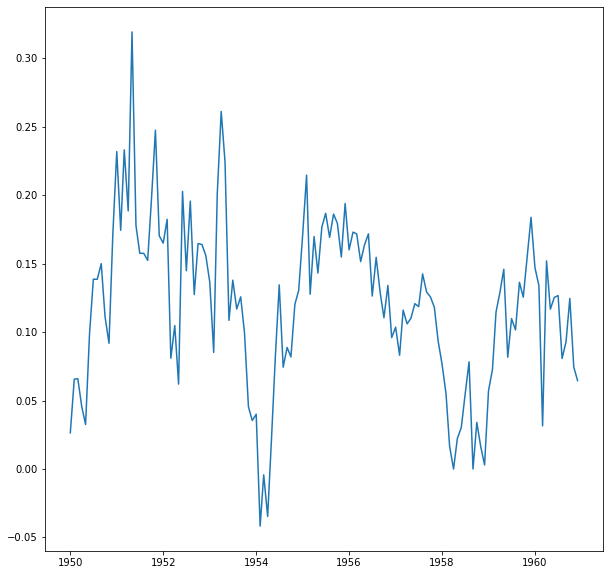

In [240]:
plt.figure(figsize=(10,10))
plt.plot(np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"]))

In [241]:
ts_log_diff = np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"])


In [242]:
ts_log_diff.dropna(inplace=True)

In [243]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [244]:
pd.concat([dataset_ts["#Passengers"],dataset_ts["#Passengers"].rolling(window=3).mean()],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000



#### ---------------------------------------------------------------------------------


## Rolling metrics

## ADF -- augmented dickey fuller test

## KPSS test

## PP test

#### ---------------------------------------------------------------------------------

## ACF PACF

## ljung Box hypothesis testing


In [249]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


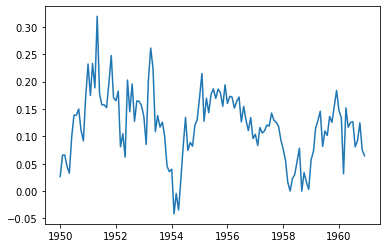

In [250]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift(12)



plt.plot(ts_log_diff)

In [251]:
#DIFFRENCING


pd.concat([ts_log["#Passengers"] , ts_log["#Passengers"].shift(2)],axis=1)




,#Passengers,#Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,4.718499
1949-04-01,4.859812,4.770685
1949-05-01,4.795791,4.882802
...,...,...
1960-08-01,6.406880,6.282267
1960-09-01,6.230481,6.432940
1960-10-01,6.133398,6.406880


In [254]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [257]:
from datetime import datetime

datetime(1949,4,7)



datetime.datetime(1949, 4, 7, 0, 0)

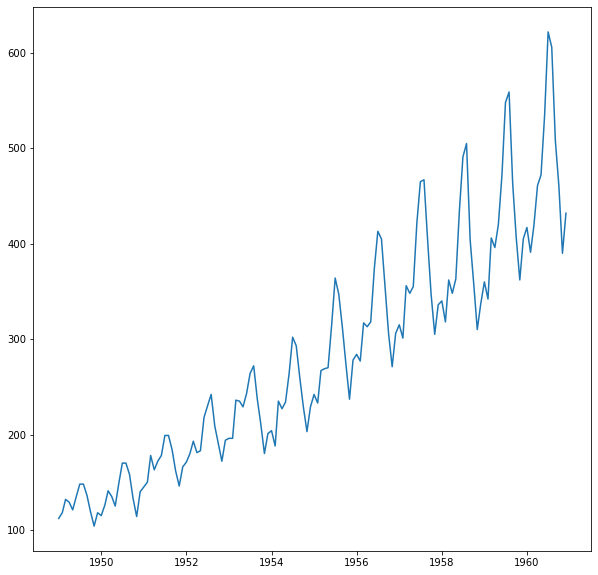

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.plot(ts)


# Hypothesis Testing (Stationarity test)

In [136]:
from statsmodels.tsa.stattools import adfuller





In [137]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [261]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 144, dtype: float64

In [262]:



ma = ts_log_diff.rolling(window=12).mean()
ms= ts_log_diff.rolling(window=12).std()

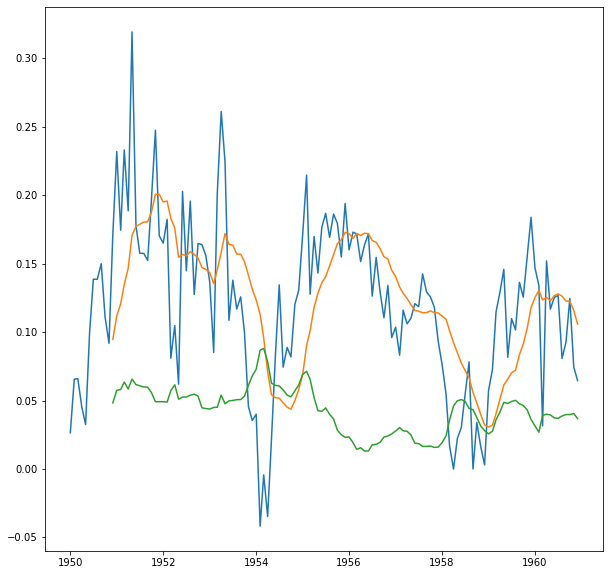

In [263]:
plt.figure(figsize=(10,10))
plt.plot(ts_log_diff)
plt.plot(ma)
plt.plot(ms)

In [264]:
from statsmodels.tsa.stattools import adfuller
#hypothesis test

#H0  -- not stationery  (reject NULL HYPOTHESIS)  --- p-value <.05 (reject)
#HA  -- stationery  (accept)
#??adfuller

In [266]:
ts_log_diff.dropna(inplace=True)
adfuller(ts_log_diff, autolag='AIC')

(-2.70957681898857,
 0.07239567181769463,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)

In [270]:
#abstract the complexity from end user


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
   # rolmean = pd.rolling_mean(timeseries, window=12)

    #rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    print("--------------------------------------------")
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:') 
    
    dftest = adfuller(timeseries, autolag='AIC')
    #PP
    #KPSS
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    #for key,value in dftest[4].items():
        #dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [204]:
??adfuller

In [268]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

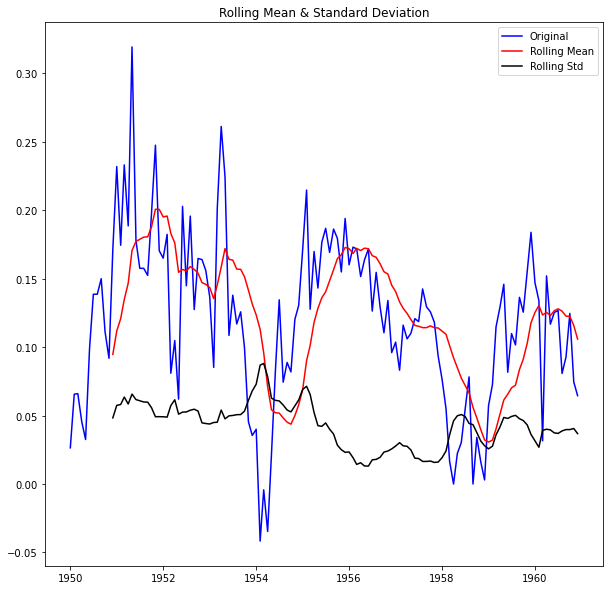

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
dtype: float64


In [271]:
test_stationarity(ts_log_diff)


# as we can see above that p-value is
## p-value             =             0.072396

# we can't reject NULL Hypothesis, i.e.
## timeseries is NOT Stationery

## ---------------------------------------------- 
### Further Try to make it stationery using different approach now

* differencing by moving average


In [209]:

ts_log_diff_ma = ts_log - ts_log.rolling(window=12).mean()
ts_log_diff_ma

,#Passengers
Month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,NaN
...,...
1960-08,0.282363
1960-09,0.098235
1960-10,-0.009230


In [210]:
ts_log_diff_ma.dropna(inplace=True)

In [211]:
ts_log_diff_ma

,#Passengers
Month,
1949-12,-0.065494
1950-01,-0.093449
1950-02,-0.007566
1950-03,0.099416
1950-04,0.052142
...,...
1960-08,0.282363
1960-09,0.098235
1960-10,-0.009230


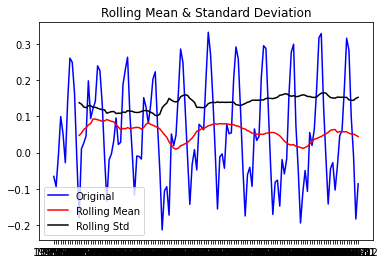

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64


In [213]:
test_stationarity(ts_log_diff_ma["#Passengers"])

# as we can see above that p-value is
## p-value             =             0.022235

# we can reject NULL Hypothesis, i.e.
## timeseries is NOW Stationery

# -------------------------------------------------------------------------

## alternate approaches

## Approach 3

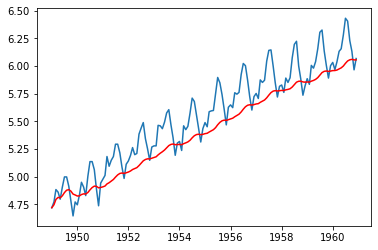

In [272]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = ts_log.ewm( halflife=12).mean()

## ??df_test_ewma = df_test.ewm(span=2).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [274]:
ts_log_ewma_diff = ts_log - expwighted_avg


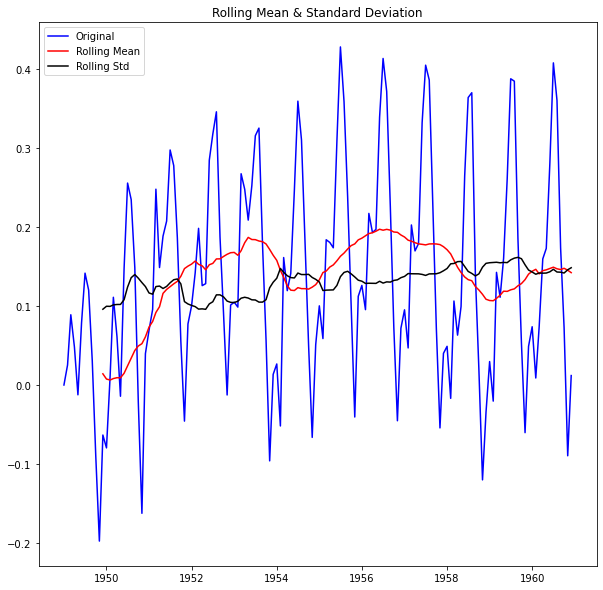

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [275]:

#ts_log_moving_avg_diff
test_stationarity(ts_log_ewma_diff["#Passengers"])

# Approach 4

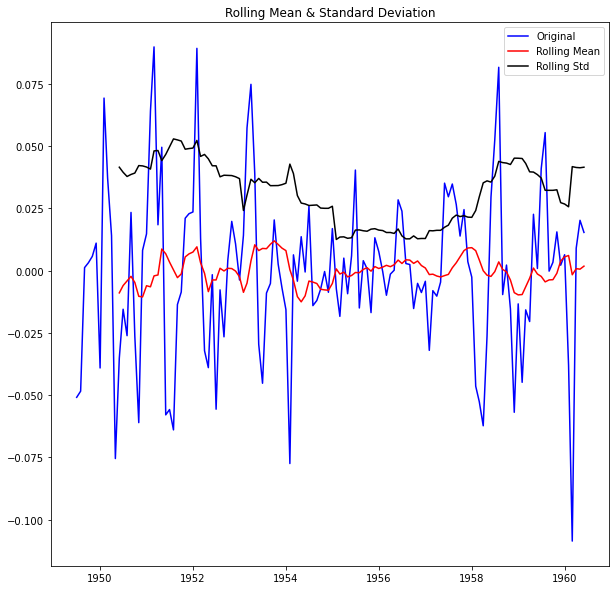

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64


In [277]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

test_stationarity(ts_log_decompose)





# -----------------------------------------------------------------------------------------